<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

import warnings
warnings.filterwarnings("ignore")

In [2]:
seaborn.__version__

'0.9.0'

In [3]:
dataset = pandas.read_csv('.\datasets\hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [4]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [5]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [6]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?  

In [7]:
dataset['ef_score'].describe()

count    1378.000000
mean        6.785610
std         0.883601
min         2.880000
25%         6.250000
50%         6.900000
75%         7.410000
max         9.190000
Name: ef_score, dtype: float64

In [8]:
dataset['hf_score'].describe()

count    1378.000000
mean        6.993444
std         1.025811
min         3.765827
25%         6.336685
50%         6.923840
75%         7.894660
max         9.126313
Name: hf_score, dtype: float64

In [9]:
dataset['pf_identity'].describe()

count    1378.000000
mean        7.334180
std         3.159473
min         0.000000
25%         5.000000
50%         9.166667
75%        10.000000
max        10.000000
Name: pf_identity, dtype: float64

### 1.1 Para comenzar con un pantallazo de los datos, calcular el rango de las variables.


In [10]:
print ( dataset['pf_identity'].max() - dataset['pf_identity'].min() )

10.0


In [11]:
print ( dataset['hf_score'].max() - dataset['hf_score'].min() )

5.360486062


In [12]:
print ( dataset['ef_score'].max() - dataset['ef_score'].min() )

6.31


### 1.2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 

In [13]:
# media, mediana y desviacion estandard de pf_identity, hf_score en el mundo y en el mundo

dataset_latam = dataset.query('region=="Latin America & the Caribbean"')
dataset_world = dataset.query('region!="Latin America & the Caribbean"')

print("pf_identity mundo")
print("mean=", dataset_world['pf_identity'].mean())
print("median=", dataset_world['pf_identity'].median())
print("sd=", dataset_world['pf_identity'].std())
print("\n")
print("pf_identity LATAM")
print("mean=", dataset_latam['pf_identity'].mean())
print("median=", dataset_latam['pf_identity'].median())
print("sd=", dataset_latam['pf_identity'].std())
print("\n")
print("hf_score mundo")
print("mean=", dataset_world['hf_score'].mean())
print("median=", dataset_world['hf_score'].median())
print("sd=", dataset_world['hf_score'].std())
print("\n")
print("hf_score LATAM")
print("mean=", dataset_latam['hf_score'].mean())
print("median=", dataset_latam['hf_score'].median())
print("sd=", dataset_latam['hf_score'].std())



pf_identity mundo
mean= 7.044502617793194
median= 8.333333332999999
sd= 3.3037709960911856


pf_identity LATAM
mean= 8.765086206909483
median= 10.0
sd= 1.7117319741534651


hf_score mundo
mean= 6.982402868542757
median= 6.867190743
sd= 1.0908612143714616


hf_score LATAM
mean= 7.047981929952586
median= 7.02804474
sd= 0.6089040915687837


In [14]:
dataset_latam['pf_identity'].describe()

count    232.000000
mean       8.765086
std        1.711732
min        5.000000
25%        7.500000
50%       10.000000
75%       10.000000
max       10.000000
Name: pf_identity, dtype: float64

### 1.3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?

Respuesta

Puede tener que ver tambien la cantidad de respuestas? por ejemplo, en 80 casos, no hay valores para pf_identity

### 1.4. ¿Cómo pueden sanearse los valores faltantes?
  

### 1.5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

Respuesta

Podemos utilizar boxplot para identificar los outliers.
Los outliers son por grupo, por region en este caso, como se puede observar en los boxplot que siguen. 
No los eliminaría porque no parecen ser errores en la carga, sino datos correctos.
  

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

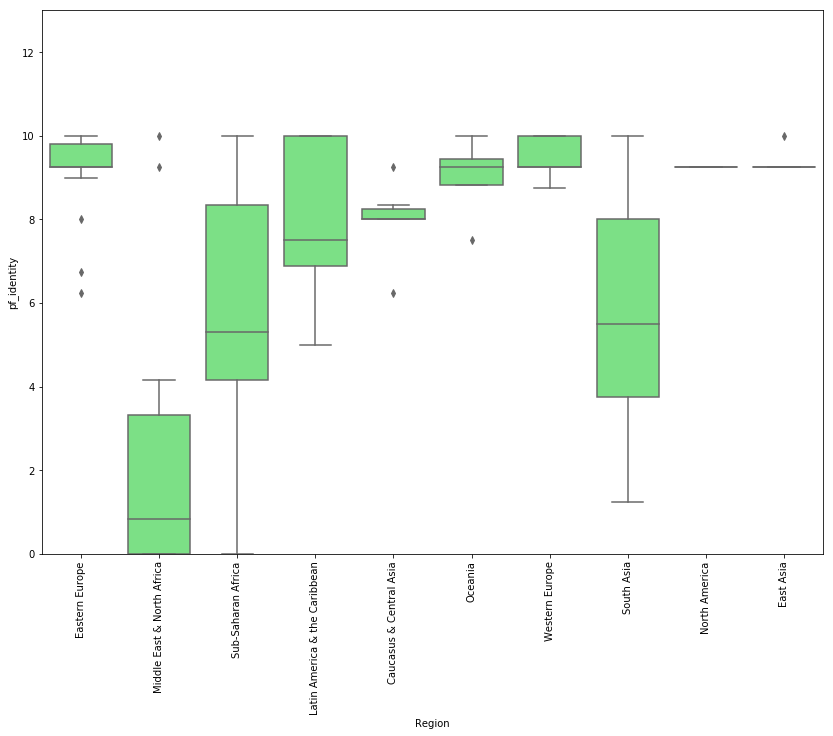

In [15]:
dataset_2016 = dataset.query('year==2016')
plt.figure( figsize=(14,10))
seaborn.boxplot(data=dataset_2016, x="region", y="pf_identity", color=GREEN)
plt.ylabel("pf_identity")
plt.xlabel("Region")
plt.ylim(0,13)
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

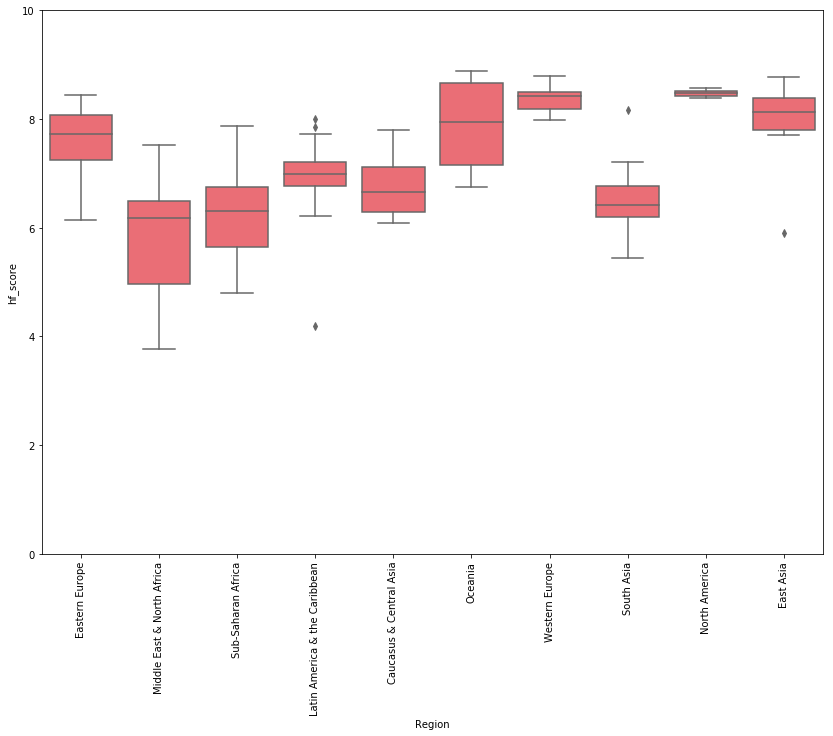

In [16]:
dataset_2016 = dataset.query('year==2016')
plt.figure( figsize=(14,10))
seaborn.boxplot(data=dataset_2016, x="region", y="hf_score", color=RED)
plt.ylabel("hf_score")
plt.xlabel("Region")
plt.ylim(0,10)
plt.xticks(rotation='vertical')

In [17]:
dataset[['hf_score','pf_identity']].quantile(0.25)

hf_score       6.336685
pf_identity    5.000000
Name: 0.25, dtype: float64

In [18]:
dataset[['hf_score','pf_identity']].quantile(0.50)

hf_score       6.923840
pf_identity    9.166667
Name: 0.5, dtype: float64

In [19]:
dataset[['hf_score','pf_identity']].quantile(0.75)

hf_score        7.89466
pf_identity    10.00000
Name: 0.75, dtype: float64

## 2. Agregación de datos

### 2. 1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.

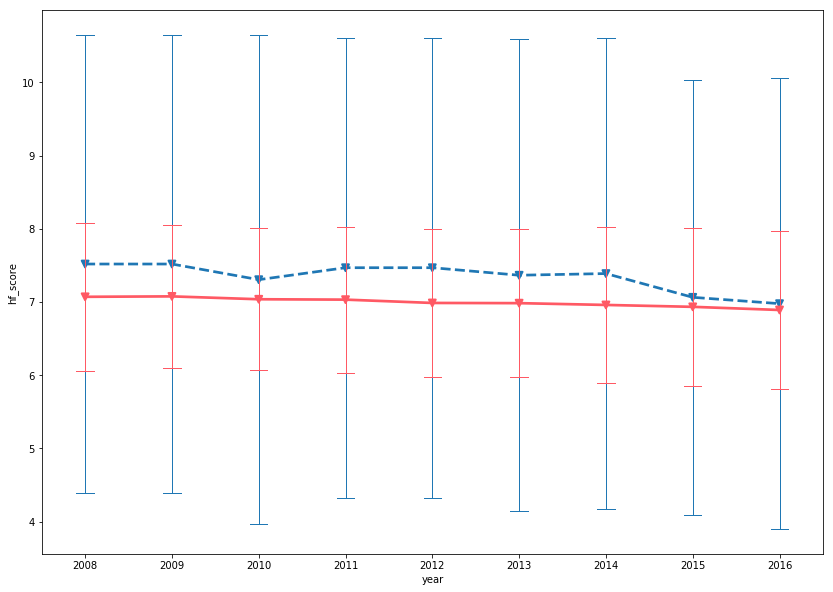

In [20]:
plt.figure( figsize=(14,10))
seaborn.pointplot ( data=dataset, x='year', y='pf_identity', 
                  markers='v', dodge=True,
                 linestyles='--', errwidth=1, ci='sd', capsize=0.2)
seaborn.pointplot ( data=dataset, x='year', y='hf_score', 
                  markers='v', dodge=True, color=RED,
                 linestyles='-', errwidth=1, ci='sd', capsize=0.2)

### 2.2 Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?

Respuesta

En el caso de pf_identity, se puede observar que al abrir la metrica en regiones, las regiones no tienen la misma tendencia. Se observa que existen regiones que mejoran levemente (como el Africa Sub Sahariana y Middle East-North Africa) mientras que el resto baja (notablemente por ejemplo Caucaso).

Para la metrica hf_score, donde en el agregado la tendencia es estable, se observa que Middle East-North Africa baja considerablemente a partir de 2011.


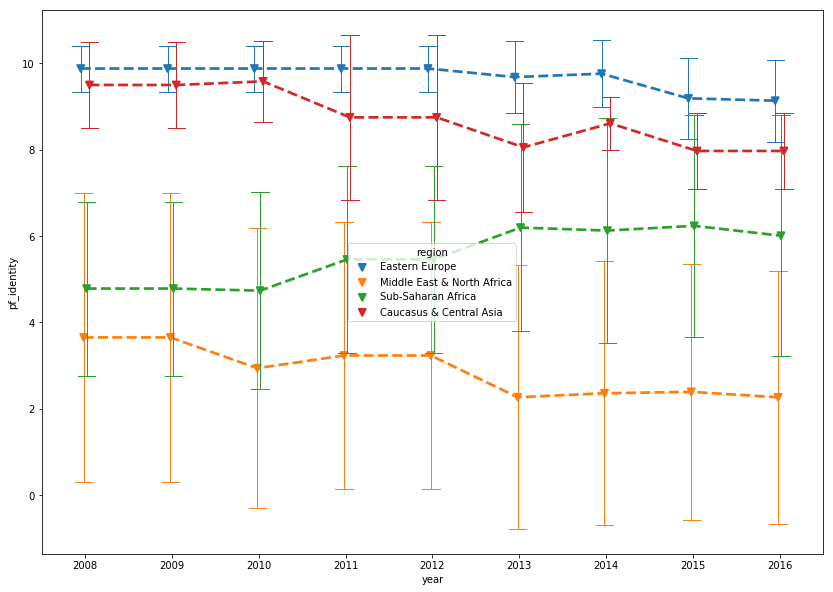

In [21]:
#### pf_identity

# todas las regiones
#ds=dataset

# solo algunas regiones, para leer mejor el grafico
#ds = dataset.query(' region != "Oceania" and region != "Western Europe" and region != "East Asia"')
ds = dataset.query(' region == "Eastern Europe" or region == "Sub-Saharan Africa" or region=="Caucasus & Central Asia" or region=="Middle East & North Africa"')

plt.figure( figsize=(14,10))
seaborn.pointplot ( data=ds, x='year', y='pf_identity', hue='region', 
                  markers='v', dodge=True,
                 linestyles='--', errwidth=1, ci='sd', capsize=0.2)


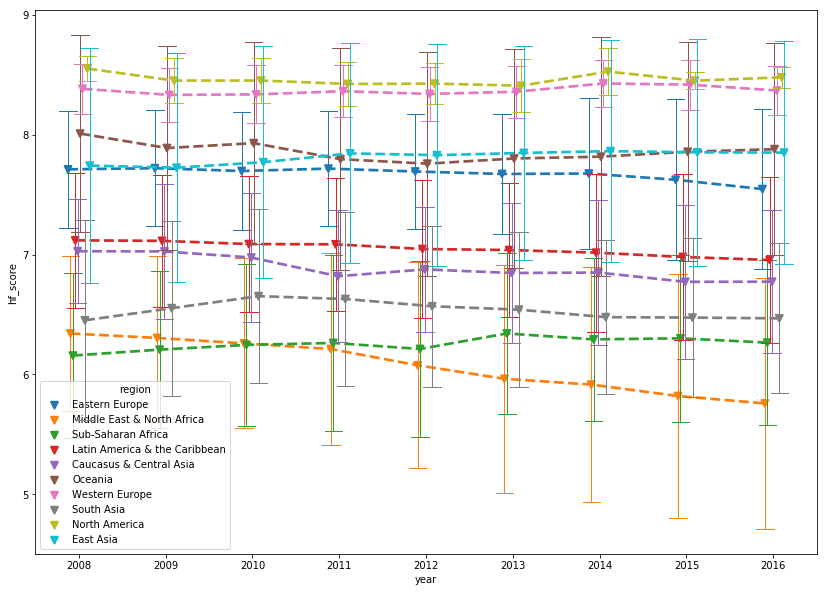

In [22]:
#### hf_score

# todas las regiones
ds=dataset

# solo algunas, regiones, para leer mejor el grafico
#ds = dataset.query(' region != "Oceania" and region != "Eastern Europe" and region != "Western Europe"')

plt.figure( figsize=(14,10))
seaborn.pointplot ( data=ds, x='year', y='hf_score', hue='region', 
                  markers='v', dodge=True,
                 linestyles='--', errwidth=1, ci='sd', capsize=0.2)


### 2.3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!


In [23]:
dataset_latam['countries'].unique()

array(['Argentina', 'Bahamas', 'Barbados', 'Belize', 'Bolivia', 'Brazil',
       'Chile', 'Colombia', 'Costa Rica', 'Dominican Rep.', 'Ecuador',
       'El Salvador', 'Guatemala', 'Guyana', 'Haiti', 'Honduras',
       'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru',
       'Suriname', 'Trinidad and Tobago', 'Uruguay', 'Venezuela'],
      dtype=object)

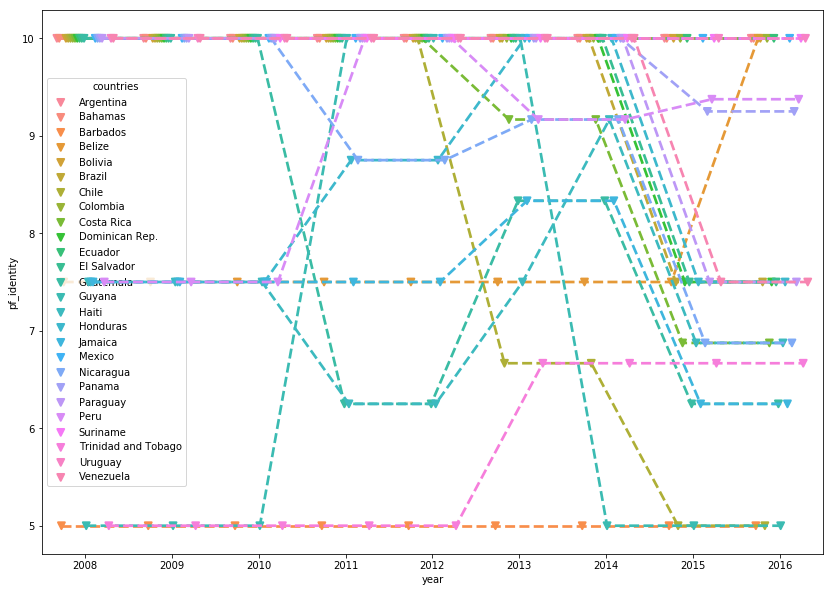

In [24]:
plt.figure( figsize=(14,10))
seaborn.pointplot ( data=dataset_latam, x='year', y='pf_identity', hue='countries', 
                  markers='v', dodge=True,
                 linestyles='--', errwidth=1, ci='sd', capsize=0.2)

In [25]:
### Armamos 2 dataset, uno para America del Sur, otro para Caribe

south_america = ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Paraguay','Peru','Guyana','Suriname','Uruguay','Venezuela']
caribe = ['Bahamas','Barbados','Belize','Costa Rica','Dominican Rep.','El Salvador','Guatemala','Haiti','Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Trinidad and Tobago']

dataset_south_america = dataset_latam.query( ' countries in @south_america'  )
dataset_caribe = dataset_latam.query( ' countries in @caribe ')

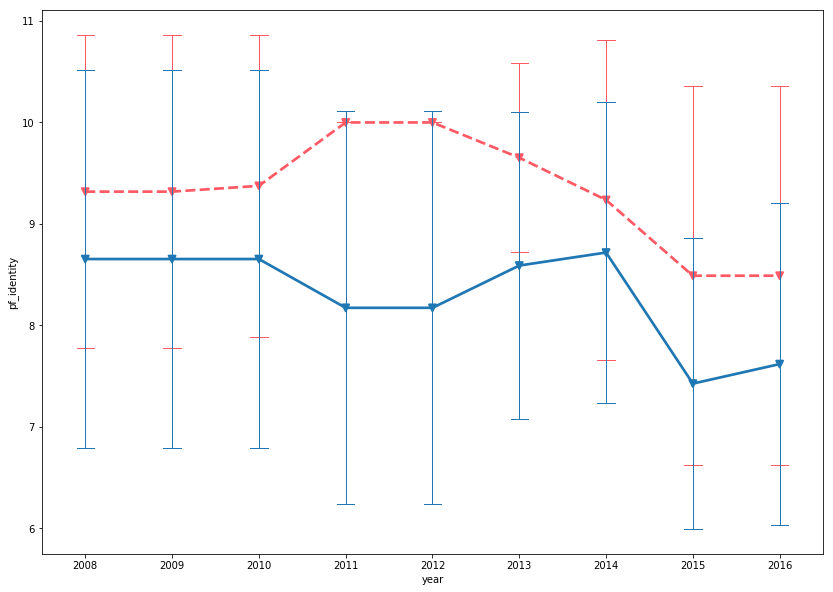

In [26]:
### Revisamos la media de America del Sur y del Caribe por separado

plt.figure( figsize=(14,10))
seaborn.pointplot ( data=dataset_south_america, x='year', y='pf_identity', 
                  markers='v', dodge=True, color=RED,
                 linestyles='--', errwidth=1, ci='sd', capsize=0.2)
seaborn.pointplot ( data=dataset_caribe, x='year', y='pf_identity', 
                  markers='v', dodge=True, 
                 linestyles='-', errwidth=1, ci='sd', capsize=0.2)

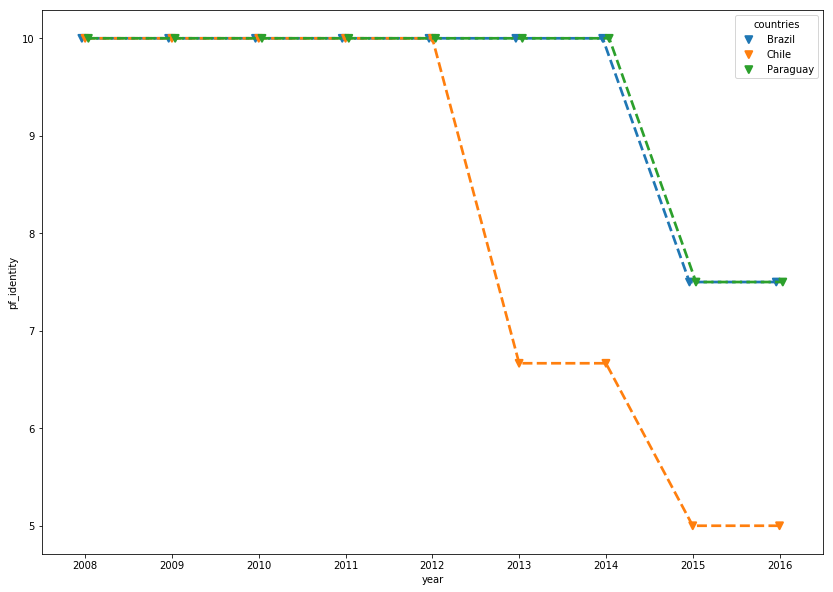

In [27]:
### Revisamos America del Sur, para ver que paises bajan de 2012 en adelante

plt.figure( figsize=(14,10))

#south_america = ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Paraguay','Peru','Guyana','Suriname','Uruguay','Venezuela']
south_america = ['Brazil','Chile','Paraguay']
dataset_south_america = dataset_latam.query( ' countries in @south_america'  )

seaborn.pointplot ( data=dataset_south_america, x='year', y='pf_identity', 
                  markers='v', dodge=True, hue='countries',
                 linestyles='--', errwidth=1, ci='sd', capsize=0.2)


### Comparación entre hf_score y ef_score
Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

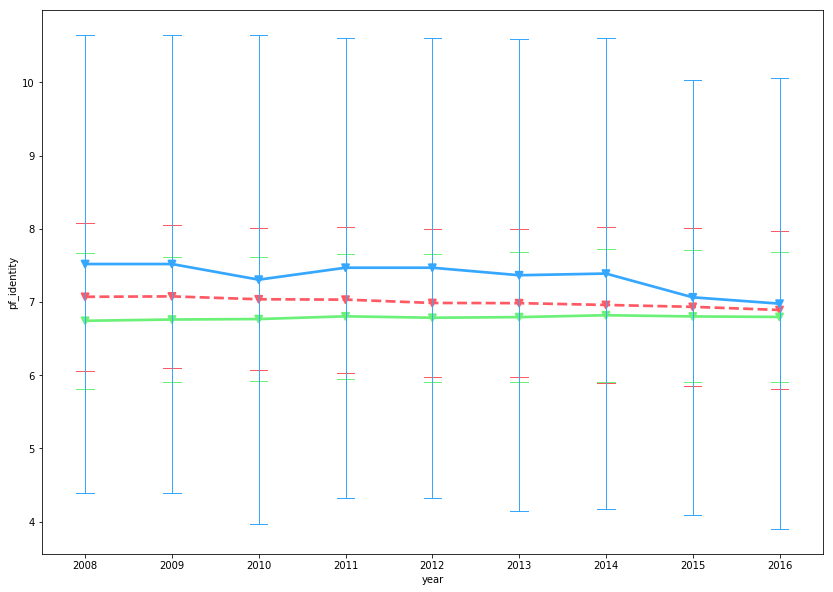

In [28]:
plt.figure( figsize=(14,10))

seaborn.pointplot ( data=dataset, x='year', y='hf_score', 
                  markers='v', dodge=True,  color=RED,
                 linestyles='--', errwidth=1, ci='sd', capsize=0.2)
seaborn.pointplot ( data=dataset, x='year', y='ef_score', 
                  markers='v', dodge=True, color=GREEN,
                 linestyles='-', errwidth=1, ci='sd', capsize=0.2)
seaborn.pointplot ( data=dataset, x='year', y='pf_identity', 
                  markers='v', dodge=True, color=BLUE,
                 linestyles='-', errwidth=1, ci='sd', capsize=0.2)


## 2. Distribuciones
### 2.1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  
Respuesta

En ambos casos (pf_identity, hf_score) visualmente corresponde con una distribucion normal asimetrica negativa

Duda: es correcto utilizar todos los registros???


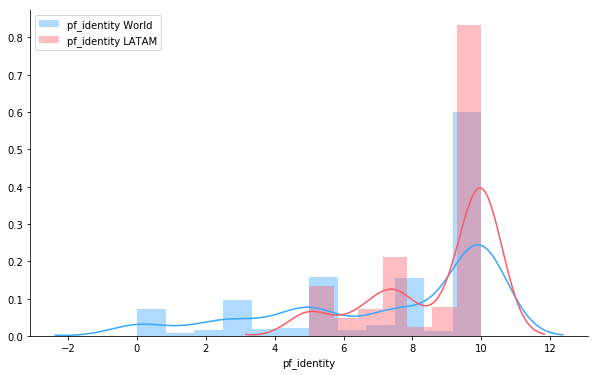

In [29]:
plt.figure(figsize=(10,6))
seaborn.distplot(dataset['pf_identity'].dropna(), color=BLUE, label='pf_identity World')
seaborn.distplot(dataset_latam['pf_identity'].dropna(), color=RED, label='pf_identity LATAM')
plt.legend()
seaborn.despine()

### Distribución de la variable hf_score en global, y en Latinoamérica y el caribe

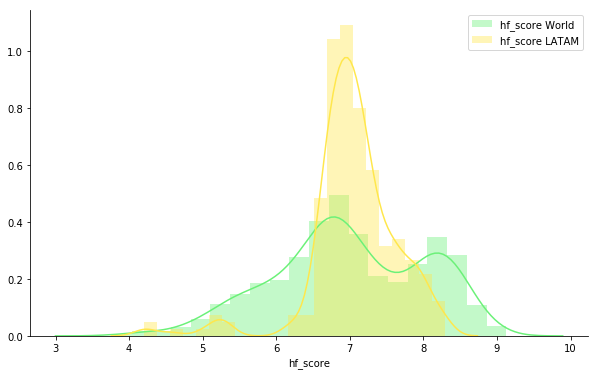

In [30]:
plt.figure(figsize=(10,6))
seaborn.distplot(dataset['hf_score'].dropna(), color=GREEN, label='hf_score World')
seaborn.distplot(dataset_latam['hf_score'].dropna(), color=YELLOW, label='hf_score LATAM')
plt.legend()
seaborn.despine()

### Distribución de la variable hf_score en Europa y en Latinoamérica y el caribe

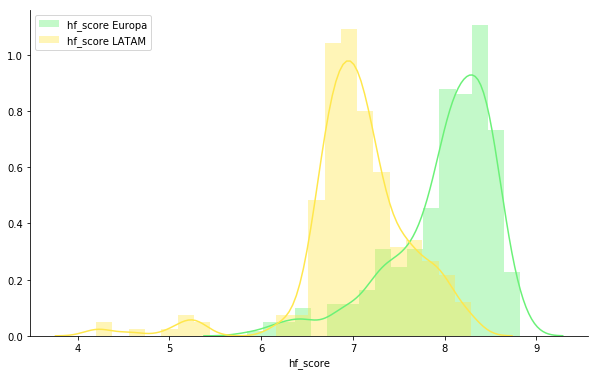

In [31]:
dataset_europe = dataset.query('region=="Eastern Europe" or region =="Western Europe"')
plt.figure(figsize=(10,6))
seaborn.distplot(dataset_europe['hf_score'].dropna(), color=GREEN, label='hf_score Europa')
seaborn.distplot(dataset_latam['hf_score'].dropna(), color=YELLOW, label='hf_score LATAM')
plt.legend()
seaborn.despine()

### ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?

#### ¿Hay outliers?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

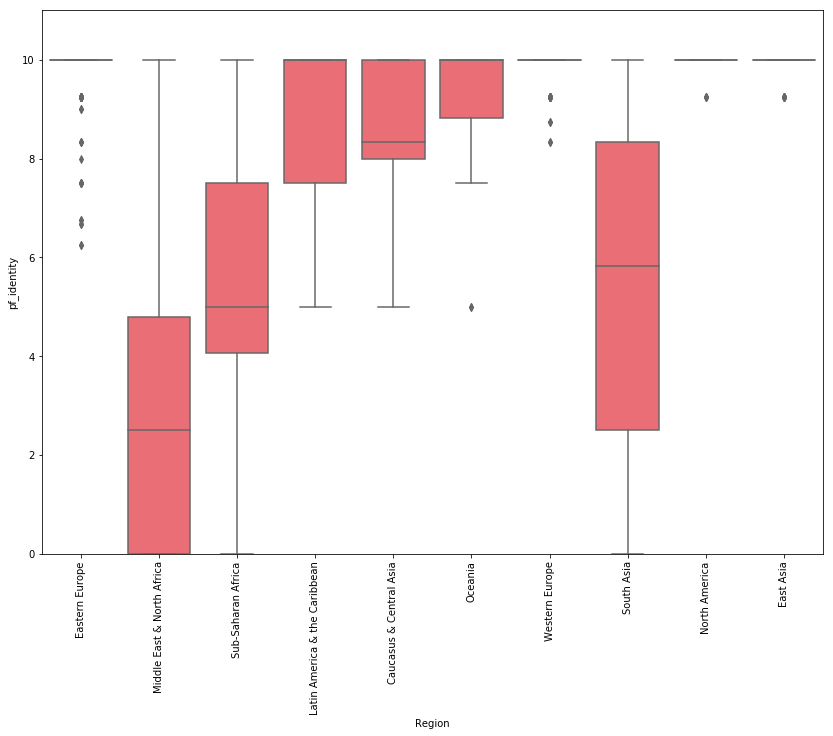

In [32]:
plt.figure( figsize=(14,10))
seaborn.boxplot(data=dataset, x="region", y="pf_identity", color=RED)
plt.ylabel("pf_identity")
plt.xlabel("Region")
plt.ylim(0,11)
plt.xticks(rotation='vertical')

In [33]:
# East Asia no tiene variacion, solo 9.25 y 10
# dataset.query('region=="East Asia"')['pf_identity']
dataset_latam['pf_identity'].unique()


array([10.        ,  5.        ,  7.5       ,  6.875     ,  6.25      ,
        9.25      ,  9.375     ,  6.66666667,  9.16666667,  8.33333333,
        8.75      ,         nan])

### 2.2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
 

In [34]:
from scipy import stats

x=dataset_latam['hf_score'].dropna()
stats.kstest (x, 'norm')

KstestResult(statistic=0.9999866968877408, pvalue=0.0)

In [35]:
from scipy import stats

x=dataset_latam['pf_identity'].dropna()
stats.kstest (x, 'norm')

KstestResult(statistic=0.9999997133484281, pvalue=0.0)

Respuesta:

para Latam:

Al ser p-value = 0, podemos rechazar la H0, es decir rechazar la hipotesis de que los datos analizados siguen una distribucion Normal

In [36]:
from scipy import stats

x=dataset['pf_identity'].dropna()
stats.kstest (x, 'norm')

KstestResult(statistic=0.9146901895363428, pvalue=0.0)

Respuesta:

para World:

Al ser p-value = 0, podemos rechazar la H0, es decir rechazar la hipotesis de que los datos analizados siguen una distribucion Normal

### 2.3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar ambas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  
  Duda: hay que comparar ambas distribuciones entre si? o contra una distribucion de muestra?


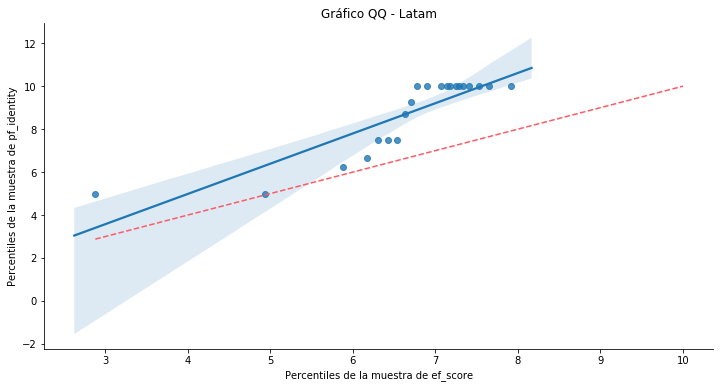

In [37]:
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_ef = numpy.percentile( dataset_latam['ef_score'].dropna(), percs)
qn_pf = numpy.percentile( dataset_latam['pf_identity'].dropna(), percs)

plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_ef, y=qn_pf)
plt.xlabel('Percentiles de la muestra de ef_score')
plt.ylabel('Percentiles de la muestra de pf_identity')
plt.title('Gráfico QQ - Latam')

x = numpy.linspace(numpy.min((qn_ef.min(), qn_pf.min())), numpy.max((qn_ef.max(),qn_pf.max())))
plt.plot(x,x, color=RED, ls="--")

seaborn.despine()

### 2.4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

## 3. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)


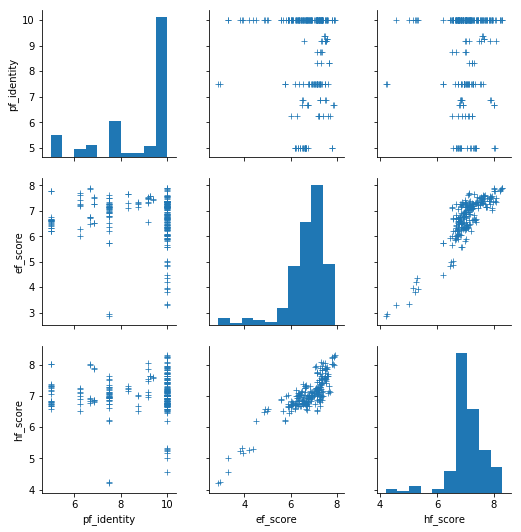

In [38]:
seaborn.pairplot(
    data=dataset_latam,
    vars=['pf_identity', 'ef_score', 'hf_score'],
    markers='+')

In [58]:
dataset[['ef_score','hf_score', 'pf_identity']].corr(method='pearson')


,ef_score,hf_score,pf_identity
ef_score,1.000000,0.860647,0.426993
hf_score,0.860647,1.000000,0.686109
pf_identity,0.426993,0.686109,1.000000


In [59]:
dataset[['ef_score','hf_score', 'pf_identity']].corr(method='spearman')

,ef_score,hf_score,pf_identity
ef_score,1.000000,0.860647,0.426993
hf_score,0.860647,1.000000,0.686109
pf_identity,0.426993,0.686109,1.000000


Respuesta:

Parecería que - consolidado a nivel mundial - no hay correlación entre ef_score y pf_identity.

Duda: dan igual Pearson que Spearman??

#### Hacemos un analisis por Region...

In [43]:
dataset_europe[['ef_score','hf_score', 'pf_identity']].corr(method='pearson')

,ef_score,hf_score,pf_identity
ef_score,1.000000,0.889352,0.078795
hf_score,0.889352,1.000000,0.175733
pf_identity,0.078795,0.175733,1.000000


In [55]:
dataset_north_america = dataset.query('region=="North America"')
dataset_north_america[['ef_score','hf_score', 'pf_identity']].corr(method='pearson')

,ef_score,hf_score,pf_identity
ef_score,1.000000,0.736774,-0.025117
hf_score,0.736774,1.000000,-0.004444
pf_identity,-0.025117,-0.004444,1.000000


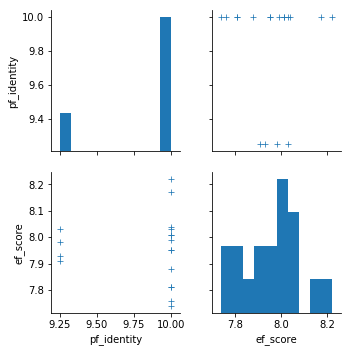

In [56]:
seaborn.pairplot(
    data=dataset_north_america,
    vars=['pf_identity', 'ef_score'],
    markers='+')

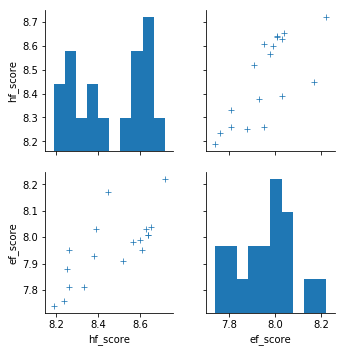

In [57]:
seaborn.pairplot(
    data=dataset_north_america,
    vars=['hf_score', 'ef_score'],
    markers='+')

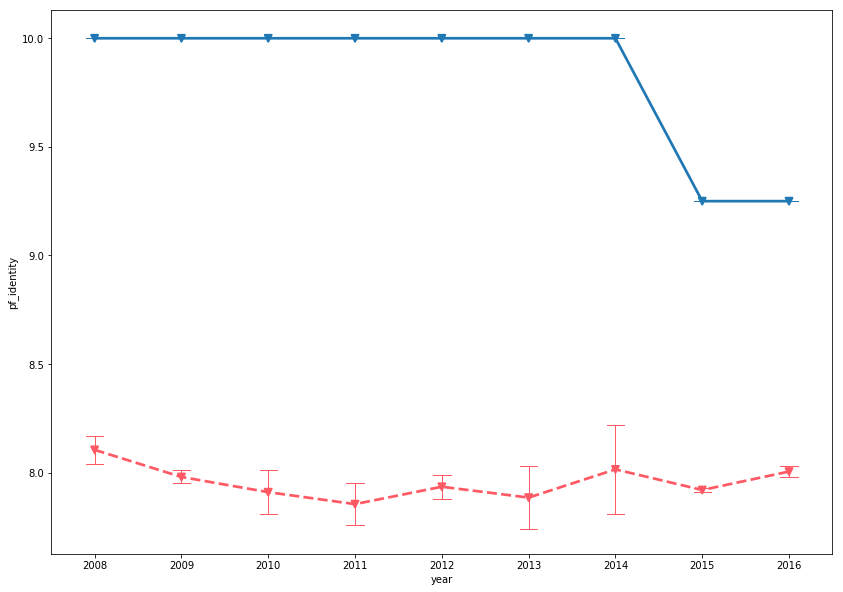

In [48]:
# dataset_europe
# ds = dataset_europe


ds = dataset_north_america

plt.figure( figsize=(14,10))
seaborn.pointplot ( data=ds, x='year', y='ef_score', 
                  markers='v', dodge=True, color=RED,
                 linestyles='--', errwidth=1, ci='sd', capsize=0.2)
seaborn.pointplot ( data=ds, x='year', y='pf_identity', 
                  markers='v', dodge=True, 
                 linestyles='-', errwidth=1, ci='sd', capsize=0.2)